In [1]:
#Create an “Academic performance” dataset of students and perform the following operations using
#Python.

import pandas as pd
data = {
    "s_id" : [1013,1,None,4,7,1,3,None,6,5,2,8,None,10],
    "s_name":["abc","efg","hyj","klm","nop","iod","dfg","abc","dgf","hyj","gsb","nop","iod","dfg"],
    "grade":["A","A","F","A+","B+","F","P","A","B","F","A+","B+","F","P"],
    "attendance":[100,8,3,6,None,7,6,1,3,9,5,None,4,1],
}
df = pd.DataFrame(data)
print(df)

      s_id s_name grade  attendance
0   1013.0    abc     A       100.0
1      1.0    efg     A         8.0
2      NaN    hyj     F         3.0
3      4.0    klm    A+         6.0
4      7.0    nop    B+         NaN
5      1.0    iod     F         7.0
6      3.0    dfg     P         6.0
7      NaN    abc     A         1.0
8      6.0    dgf     B         3.0
9      5.0    hyj     F         9.0
10     2.0    gsb    A+         5.0
11     8.0    nop    B+         NaN
12     NaN    iod     F         4.0
13    10.0    dfg     P         1.0


In [2]:
df.shape

(14, 4)

In [3]:
df.describe()

,s_id,attendance
count,11.000000,12.000000
mean,96.363636,12.750000
std,304.027720,27.594878
min,1.000000,1.000000
25%,2.500000,3.000000
50%,5.000000,5.500000
75%,7.500000,7.250000
max,1013.000000,100.000000


In [4]:
#1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
#inconsistencies, use any of the suitable techniques to deal with them.

df.isnull().sum()

s_id          3
s_name        0
grade         0
attendance    2
dtype: int64

In [5]:
df['s_id'].fillna(0, inplace=True)
df['attendance'].fillna(0, inplace=True)

C:\Users\dhans\AppData\Local\Temp\ipykernel_18588\2792429051.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['s_id'].fillna(0, inplace=True)
C:\Users\dhans\AppData\Local\Temp\ipykernel_18588\2792429051.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

In [6]:
df.isnull().sum()

s_id          0
s_name        0
grade         0
attendance    0
dtype: int64

In [8]:
#2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques
# to deal with them.
import numpy as np
from scipy.stats import zscore  
numeric_column =  ["s_id","attendance"]
z_scores = np.abs(zscore(df[numeric_column]))
#an outlier is a data point that differs significantly from other observations.
outliers = (z_scores > 3).all(axis=1) 
outliers

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [9]:
df[outliers]

,s_id,s_name,grade,attendance
0,1013.0,abc,A,100.0


In [10]:
df[~outliers]

,s_id,s_name,grade,attendance
1,1.0,efg,A,8.0
2,0.0,hyj,F,3.0
3,4.0,klm,A+,6.0
4,7.0,nop,B+,0.0
5,1.0,iod,F,7.0
6,3.0,dfg,P,6.0
7,0.0,abc,A,1.0
8,6.0,dgf,B,3.0
9,5.0,hyj,F,9.0
10,2.0,gsb,A+,5.0


In [16]:
# 3. Apply data transformations on at least one of the variables. The purpose of this
# transformation should be one of the following reasons: to change the scale for better
# understanding of the variable, to convert a non-linear relation into a linear one, or to decrease
# the skewness and convert the distribution into a normal distribution.

print(f"Skewness of 'attendance' before transformation: {df['attendance'].skew()}")

Skewness of 'attendance' before transformation: 3.658168613557838


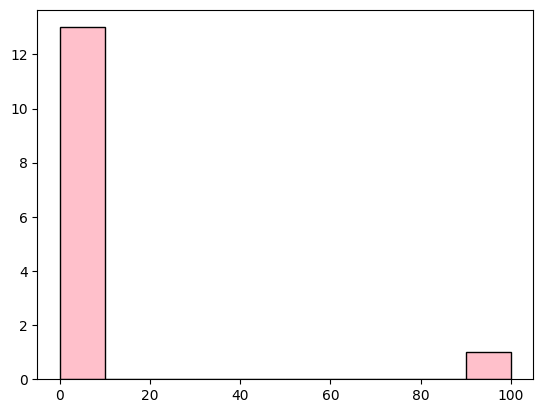

In [12]:
import matplotlib.pyplot as plt
plt.hist(df['attendance'],color="pink",edgecolor="black")
plt.show()

In [13]:
import numpy as np
df['attendance_transformed'] = np.log1p(df['attendance'])


In [14]:
print(f"Skewness of 'attendance' after transformation: {df['attendance_transformed'].skew()}")

Skewness of 'attendance' after transformation: 1.0262745372396704


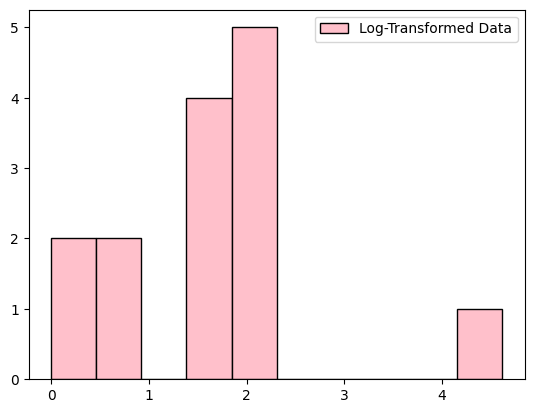

In [15]:
plt.hist(df['attendance_transformed'],color="pink",edgecolor="black",label='Log-Transformed Data')
plt.legend()
plt.show()